<a href="https://colab.research.google.com/github/maledias/imdb/blob/main/imdb_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando reviews de filmes

A ideia deste notebook é criar um modelo capaz de classificar críticas de filmes como positivas ou negativas de acordo com o texto da crítica.

O modelo será treinado com o dataset IMDB, que possui 25 mil reviews para treino e 25 mil para teste, cada um com 50% de reviews positivas e 50% de reviews negativas.

## Explorando o dataset

Para baixar o dataset, podemos utilizar o keras. Neste caso, cada review já foi processada e transformada em uma sequência de números inteiros, onde cada número inteiro representa uma palavra.

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.6.0


In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


O parâmetro `num_words=10000` indica que serão levadas em conta apenas as 10000 palavras mais comuns de todo o dataset.

Os objetos armazenado em `train_data` e `test_data` são arrays de listas, e cada lista é uma sequência de números inteiros, representando uma review específica.

Antes de passar os dados para a nossa rede neural, será necessário transoformá-los para que todos possuam o mesmo tamanho.

In [4]:
train_data.shape

(25000,)

In [5]:
type(train_data)

numpy.ndarray

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
type(train_data[0])

list

Já os objetos armazenados em `train_labels` e `test_labels` arrays de 0's e 1's, indicando se o review é positivo ou negativo.

In [8]:
test_labels.shape

(25000,)

In [9]:
type(test_labels)

numpy.ndarray

In [10]:
test_labels[0]

0

Já que `num _words` foi definido como `=1000`, o maior índice possível em cada lista representando uma review será 9999:

In [11]:
max([max(review) for review in train_data])

9999

Com o keras, nós também podemos obter um dicionário que indica qual é a palavra correspondente de índice nos dados de reviews:

In [12]:
word_index = tf.keras.datasets.imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Assim, podemos criar uma função para transformar as reviews representadas com números em reviews representadas em inglês:

In [13]:
def review_in_english(review):
    # Transforma chaves em valores e valores em chaves:
    index_word = {index:word for word, index in word_index.items()}
    text = [index_word[index] for index in review]
    return " ".join(text)

In [14]:
review_in_english(train_data[0])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

Talvez a crítica não parece fazer muito sentido porque ela é composta apenas das 10000 palavras mais comuns em todo o dataset.

## Preprocessando os dados

Para vetorizar as reviews, vamos aplicar one-hot-encoding. 

Isso significa que todas as reviews serão formadas por 10000 índices, com o valor 0 para cada índice de palavra não existente na review e 1 para cada índice existente na review.

Por exemplo, a seguinte review:

`[566, 788, 9994]`

Terá o valor 0 para todos os índices exceto 566, 788, 9994, que terão valor 1.

In [15]:
import numpy as np

In [16]:
def one_hot_encode_reviews(reviews, num_words=10000):
    one_hot_encoded_reviews = np.zeros(shape=(len(reviews), num_words))
    for index, review in enumerate(reviews):
        one_hot_encoded_reviews[index, review] = 1
    return one_hot_encoded_reviews

In [17]:
X_train = one_hot_encode_reviews(train_data)
X_test = one_hot_encode_reviews(test_data)

In [18]:
X_train.shape, X_test.shape

((25000, 10000), (25000, 10000))

Agora vamos vetorizar as labels:

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
y_train, y_test

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

In [21]:
y_train.shape, y_test.shape

((25000,), (25000,))

## Criando dados de validação

Para monitorar a performance do modelo durante o treino, com dados que não foram utilizados durante o treino e que nãos serão utilizados para testar o modelo, vamos criar um subconjunto de dados de validação

In [22]:
X_val = X_train[:10000]
X_train_partial = X_train[10000:]
y_val = y_train[:10000]
y_train_partial = y_train[10000:]

## Criando o modelo

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')                                    
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['accuracy']
)

In [45]:
history = model.fit(
    X_train_partial,
    y_train_partial,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5336 - accuracy: 0.7741 - val_loss: 0.4049 - val_accuracy: 0.8701
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3235 - accuracy: 0.9005 - val_loss: 0.3372 - val_accuracy: 0.8721
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2365 - accuracy: 0.9262 - val_loss: 0.2812 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1821 - accuracy: 0.9435 - val_loss: 0.2768 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1487 - accuracy: 0.9520 - val_loss: 0.2904 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1208 - accuracy: 0.9646 - val_loss: 0.3271 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0968 - accuracy: 0.9725 - val_loss: 0.3493 - val_accuracy: 0.8735
Epoch 8/20
30

## Plotando os resultados

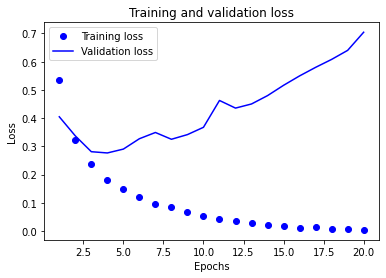

In [46]:
import matplotlib.pyplot as plt
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

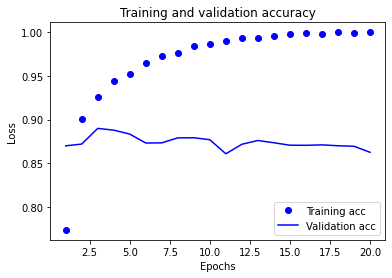

In [47]:
plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.7951 - accuracy: 0.8455


[0.7950941920280457, 0.8454800248146057]